<center> <font size=6> Projet Optimisation AirFrance - Statistiques </font> </center>
<center> Tony WU </center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Jour-1---Statistiques" data-toc-modified-id="Jour-1---Statistiques-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Jour 1 - Statistiques</a></span></li></ul></div>

# Imports

In [1]:
import os
import pandas as pd
from pandas_profiling import ProfileReport

In [6]:
data_source = 'data'
list_csv = []

for filename in os.listdir(data_source):
    if filename[-4:] == '.csv':
        list_csv.append(os.path.join(data_source, filename))

list_csv = sorted(list_csv)
list_csv

['data/data_seating_10Nov.csv',
 'data/data_seating_11Nov.csv',
 'data/data_seating_12Nov.csv',
 'data/data_seating_14Nov.csv',
 'data/data_seating_15Nov.csv',
 'data/data_seating_16Nov.csv',
 'data/data_seating_17Nov.csv',
 'data/data_seating_7Nov.csv',
 'data/data_seating_8Nov.csv']

In [8]:
def get_filepath(date):
    return os.path.join(data_source, f'data_seating_{date}.csv')

# Jour 1 - Statistiques

In [17]:
df = pd.read_csv(get_filepath('7Nov'))

# Conversion en TimeStamp
df['TransitTime'] = pd.to_datetime(df['TransitTime']).dt.time

df

,Femmes,Hommes,Enfants,WCHR,Classe,TransitTime
0,0,1,0,0,Y,01:15:00
1,1,0,0,0,Y,00:00:00
2,0,1,0,0,Y,00:00:00
3,1,0,0,0,Y,00:00:00
4,0,2,0,0,Y,05:25:00
...,...,...,...,...,...,...
106,1,0,0,0,Y,03:30:00
107,2,0,0,0,Y,05:25:00
108,2,0,0,0,Y,05:25:00
109,2,0,0,0,Y,01:35:00


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Femmes       111 non-null    int64 
 1   Hommes       111 non-null    int64 
 2   Enfants      111 non-null    int64 
 3   WCHR         111 non-null    int64 
 4   Classe       111 non-null    object
 5   TransitTime  111 non-null    object
dtypes: int64(4), object(2)
memory usage: 5.3+ KB


In [19]:
df['TransitTime'].iloc[0]

datetime.time(1, 15)

Generates an HTML `ProfileReport` that gives basic statistics about the data at hand.

In [20]:
profile = ProfileReport(df, title="Data Seating Profiling Report")
profile.to_file("data_seating_report.html")

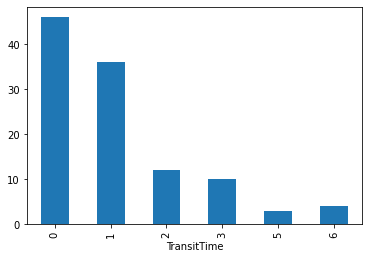

In [21]:
df['TransitTime'].groupby(df['TransitTime'].apply(lambda x: x.hour)).count().plot(kind='bar');